In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from gplearn.functions import make_function
from gplearn.fitness import make_fitness
from gplearn.genetic import SymbolicTransformer
from sklearn.model_selection import train_test_split

In [2]:
alpha = []

In [3]:
for i in range(1, 6):
    path = "alpha" + str(i) + ".csv"
    alpha.append(pd.read_csv(path, index_col=0).iloc[:, 1])
alpha.append(pd.read_csv(path, index_col=0).iloc[:, 0])
alpha_matrix = pd.concat(alpha, axis = 1)
alpha_matrix.columns = ["alpha1", "alpha2", "alpha3", "alpha4", "alpha5", "return"]
alpha_matrix.replace(-np.inf, np.nan, inplace=True)
alpha_matrix.replace(np.inf, np.nan, inplace=True)
alpha_matrix.dropna(inplace=True)

In [4]:
alpha_matrix

,alpha1,alpha2,alpha3,alpha4,alpha5,return
Time,,,,,,
2022-08-22 09:02:00,0.002226,0.000258,5.003409,8.000000,811.301151,0.001487
2022-08-22 09:03:00,-0.001487,0.000442,4.995295,0.200000,132.249017,0.002227
2022-08-22 09:04:00,-0.002227,0.001971,4.996566,0.500000,323.119896,-0.002222
2022-08-22 09:05:00,0.002222,0.000389,5.003737,6.000000,177.065677,0.000742
2022-08-22 09:06:00,-0.000742,-0.000857,4.997188,0.250000,131.048609,-0.001484
...,...,...,...,...,...,...
2022-09-01 14:56:00,-0.000716,-0.000590,4.999999,0.666667,409.146333,0.000000
2022-09-01 14:57:00,-0.000000,-0.001156,4.999572,1.000000,949.338687,0.002146
2022-09-01 14:58:00,-0.002146,0.000257,4.996268,0.166667,87.531239,-0.000714


In [5]:
X = alpha_matrix.iloc[:, :5]
y = alpha_matrix.iloc[:, 5]

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [7]:
init_function = ['add', 'sub', 'mul', 'div', 'sqrt', 'log',
                      'abs', 'neg', 'inv', 'max', 'min']

function_set = init_function

In [20]:
def _my_metric(y, y_pred, w):
    return np.sum((y - y_pred)**2)
metric = make_fitness(function=_my_metric, greater_is_better=False)

In [26]:
 gpmodel = SymbolicTransformer(
    feature_names = alpha_matrix.columns[:5], 
    function_set = function_set,
    metric = metric,
    generations = 10,
    init_depth = (1,2),
    population_size = 1000,
    tournament_size = 20, 
    p_crossover = 0.6, 
    p_subtree_mutation = 0.1,
    p_hoist_mutation = 0, 
    p_point_mutation = 0.1,
    p_point_replace = 0.4,
    verbose = 1,
    n_jobs = -1
)

gpmodel.fit(X_train, y_train)

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0     3.59      3.39942e+12        3       0.00114316              N/A      0.81s


SymbolicTransformer(feature_names=Index(['alpha1', 'alpha2', 'alpha3', 'alpha4', 'alpha5'], dtype='object'),
                    function_set=['add', 'sub', 'mul', 'div', 'sqrt', 'log',
                                  'abs', 'neg', 'inv', 'max', 'min'],
                    generations=10, init_depth=(1, 2),
                    metric=<gplearn.fitness._Fitness object at 0x000002705E9B51C0>,
                    n_jobs=-1, p_crossover=0.6, p_hoist_mutation=0,
                    p_point_mutation=0.1, p_point_replace=0.4,
                    p_subtree_mutation=0.1, verbose=1)

In [27]:
print(gpmodel)

[mul(0.177, alpha2),
 mul(alpha2, alpha2),
 mul(mul(alpha2, alpha1), abs(alpha4)),
 abs(mul(alpha1, alpha1)),
 mul(alpha1, alpha2),
 min(min(alpha3, alpha4), mul(0.174, alpha1)),
 mul(sqrt(alpha4), div(alpha1, alpha5)),
 div(max(alpha1, alpha2), div(alpha3, alpha2)),
 sqrt(mul(alpha2, alpha1)),
 min(abs(alpha1), alpha4)]


In [ ]:
# The IC of mul(alpha2, alpha2)
print("training dataset:\n {}".format(np.corrcoef(X_train.iloc[:, 1]**2, y_train)))
print("testing dataset:\n {}".format(np.corrcoef(X_test.iloc[:, 1]**2, y_test)))

In [45]:
# The IC of mul(mul(alpha2, alpha1), abs(alpha4))
print("training dataset:\n {}".format(np.corrcoef(X_train.iloc[:, 1]*X_train.iloc[:, 0]*X_train.iloc[:, 3].abs(), y_train)))
print("testing dataset:\n {}".format(np.corrcoef((X_test.iloc[:, 1]*X_test.iloc[:, 0]*X_test.iloc[:, 3].abs(), y_test))))

training dataset:
 [[1.         0.10084595]
 [0.10084595 1.        ]]
testing dataset:
 [[1.         0.10619565]
 [0.10619565 1.        ]]


In [46]:
# The IC of mul(alpha1, alpha1)
print("training dataset:\n {}".format(np.corrcoef(X_train.iloc[:, 0]**2, y_train)))
print("testing dataset:\n {}".format(np.corrcoef((X_test.iloc[:, 0]**2, y_test))))

training dataset:
 [[ 1.         -0.01632279]
 [-0.01632279  1.        ]]
testing dataset:
 [[ 1.         -0.03278857]
 [-0.03278857  1.        ]]


In [35]:
# The IC of mul(alpha1, alpha2)
print("training dataset:\n {}".format(np.corrcoef(X_train.iloc[:, 1]*X_train.iloc[:, 0], y_train)))
print("testing dataset:\n {}".format(np.corrcoef((X_test.iloc[:, 1]*X_test.iloc[:, 0], y_test))))

training dataset:
 [[ 1.         -0.04067354]
 [-0.04067354  1.        ]]
testing dataset:
 [[1.         0.12176642]
 [0.12176642 1.        ]]


In [37]:
# The IC of min(min(alpha3, alpha4), mul(0.174, alpha1))
print("training dataset:\n {}".format(np.corrcoef(np.minimum(np.minimum(X_train.iloc[:, 2], X_train.iloc[:, 3]), 0.173*X_train.iloc[:, 0]), y_train)))
print("testing dataset:\n {}".format(np.corrcoef((np.minimum(np.minimum(X_test.iloc[:, 2], X_test.iloc[:, 3]), 0.173*X_test.iloc[:, 0]), y_test))))

training dataset:
 [[1.         0.07337739]
 [0.07337739 1.        ]]
testing dataset:
 [[1.         0.16958539]
 [0.16958539 1.        ]]


In [39]:
# The IC of mul(sqrt(alpha4), div(alpha1, alpha5))
print("training dataset:\n {}".format(np.corrcoef(X_train.iloc[:, 3]**(1/2)*X_train.iloc[:, 0]/X_train.iloc[:, 4], y_train)))
print("testing dataset:\n {}".format(np.corrcoef(X_test.iloc[:, 3]**(1/2)*X_test.iloc[:, 0]/X_test.iloc[:, 4], y_test)))

training dataset:
 [[1.         0.02877139]
 [0.02877139 1.        ]]
testing dataset:
 [[1.         0.06361156]
 [0.06361156 1.        ]]


In [40]:
# The IC of div(max(alpha1, alpha2), div(alpha3, alpha2))
print("training dataset:\n {}".format(np.corrcoef(np.maximum(X_train.iloc[:, 0], X_train.iloc[:, 2])/(X_train.iloc[:, 2]/X_train.iloc[:, 1]), y_train)))
print("testing dataset:\n {}".format(np.corrcoef(np.maximum(X_test.iloc[:, 0], X_test.iloc[:, 2])/(X_test.iloc[:, 2]/X_test.iloc[:, 1]), y_test)))

training dataset:
 [[1.         0.11352925]
 [0.11352925 1.        ]]
testing dataset:
 [[1.        0.0674851]
 [0.0674851 1.       ]]


In [42]:
# The IC of abs(sqrt(mul(alpha1, alpha2)))
print("training dataset:\n {}".format(np.corrcoef((X_train.iloc[:, 1]*X_train.iloc[:, 0]).abs()**(1/2), y_train)))
print("testing dataset:\n {}".format(np.corrcoef(((X_test.iloc[:, 1]*X_test.iloc[:, 0]).abs()**(1/2), y_test))))

training dataset:
 [[1.         0.07264207]
 [0.07264207 1.        ]]
testing dataset:
 [[1.         0.06705202]
 [0.06705202 1.        ]]


In [44]:
# The IC of min(abs(alpha1), alpha4)
print("training dataset:\n {}".format(np.corrcoef(np.minimum(X_train.iloc[:, 0].abs(), X_train.iloc[:, 3]), y_train)))
print("testing dataset:\n {}".format(np.corrcoef(np.minimum(X_test.iloc[:, 0].abs(), X_test.iloc[:, 3]), y_test)))

training dataset:
 [[1.         0.02388513]
 [0.02388513 1.        ]]
testing dataset:
 [[1.         0.00979593]
 [0.00979593 1.        ]]


In [48]:
alpha_matrix.loc[:, "alpha6"] = alpha_matrix.iloc[:, 1]**2
alpha_matrix.loc[:, "alpha7"] = alpha_matrix.iloc[:, 1]*alpha_matrix.iloc[:, 0]*alpha_matrix.iloc[:, 3].abs()
alpha_matrix.loc[:, "alpha8"] = np.minimum(np.minimum(alpha_matrix.iloc[:, 2], alpha_matrix.iloc[:, 3]), 0.173*alpha_matrix.iloc[:, 0])

In [49]:
alpha_matrix

,alpha1,alpha2,alpha3,alpha4,alpha5,return,alpha6,alpha7,alpha8
Time,,,,,,,,,
2022-08-22 09:02:00,0.002226,0.000258,5.003409,8.000000,811.301151,0.001487,6.634759e-08,4.585999e-06,0.000385
2022-08-22 09:03:00,-0.001487,0.000442,4.995295,0.200000,132.249017,0.002227,1.949258e-07,-1.313023e-07,-0.000257
2022-08-22 09:04:00,-0.002227,0.001971,4.996566,0.500000,323.119896,-0.002222,3.885850e-06,-2.195162e-06,-0.000385
2022-08-22 09:05:00,0.002222,0.000389,5.003737,6.000000,177.065677,0.000742,1.509589e-07,5.180457e-06,0.000384
2022-08-22 09:06:00,-0.000742,-0.000857,4.997188,0.250000,131.048609,-0.001484,7.338000e-07,1.589869e-07,-0.000128
...,...,...,...,...,...,...,...,...,...
2022-09-01 14:56:00,-0.000716,-0.000590,4.999999,0.666667,409.146333,0.000000,3.477241e-07,2.814037e-07,-0.000124
2022-09-01 14:57:00,-0.000000,-0.001156,4.999572,1.000000,949.338687,0.002146,1.335380e-06,0.000000e+00,-0.000000
2022-09-01 14:58:00,-0.002146,0.000257,4.996268,0.166667,87.531239,-0.000714,6.604965e-08,-9.191747e-08,-0.000371


In [59]:
alpha_matrix_2 = alpha_matrix.drop("return", axis=1)

In [51]:
alpha_matrix_2

,alpha1,alpha2,alpha3,alpha4,alpha5,alpha6,alpha7,alpha8
Time,,,,,,,,
2022-08-22 09:02:00,0.002226,0.000258,5.003409,8.000000,811.301151,6.634759e-08,4.585999e-06,0.000385
2022-08-22 09:03:00,-0.001487,0.000442,4.995295,0.200000,132.249017,1.949258e-07,-1.313023e-07,-0.000257
2022-08-22 09:04:00,-0.002227,0.001971,4.996566,0.500000,323.119896,3.885850e-06,-2.195162e-06,-0.000385
2022-08-22 09:05:00,0.002222,0.000389,5.003737,6.000000,177.065677,1.509589e-07,5.180457e-06,0.000384
2022-08-22 09:06:00,-0.000742,-0.000857,4.997188,0.250000,131.048609,7.338000e-07,1.589869e-07,-0.000128
...,...,...,...,...,...,...,...,...
2022-09-01 14:56:00,-0.000716,-0.000590,4.999999,0.666667,409.146333,3.477241e-07,2.814037e-07,-0.000124
2022-09-01 14:57:00,-0.000000,-0.001156,4.999572,1.000000,949.338687,1.335380e-06,0.000000e+00,-0.000000
2022-09-01 14:58:00,-0.002146,0.000257,4.996268,0.166667,87.531239,6.604965e-08,-9.191747e-08,-0.000371


<AxesSubplot: >

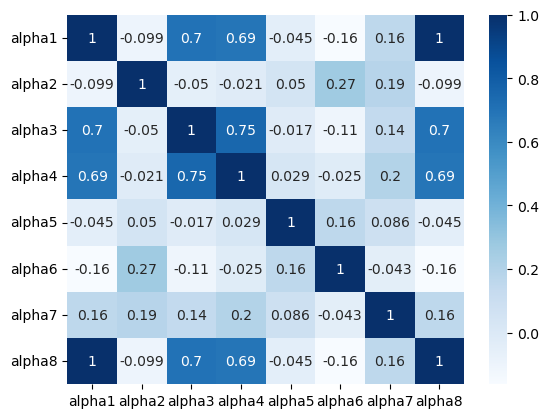

In [52]:
sns.heatmap(alpha_matrix_2.corr(),  annot=True, cmap="Blues")

In [60]:
alpha_matrix_2 = alpha_matrix_2.drop("alpha8", axis=1)

In [61]:
X = alpha_matrix_2
y = alpha_matrix.iloc[:, 5]

In [62]:
X.to_csv("X.csv")
y.to_csv("y.csv")